In [1]:
import pandas as pd
df= pd.read_csv('Clean_Dataset.csv')


In [2]:
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df.duration.min()

0.83

In [11]:
df.duration.median()

11.25

In [12]:
df.duration.max()

49.83

In [13]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
47.08       1
41.58       1
37.17       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

##  PREPROCESSING


In [14]:
print(df.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


In [15]:
print(df.columns.tolist())

['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [16]:
# Drop columns only if they exist
df = df.drop(columns=['Unnamed: 0', 'flight'], errors='ignore')

# Encode 'class' column
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [17]:
df.stops= pd.factorize(df.stops)[0]

In [18]:
df

airline source_city departure_time  stops   arrival_time  \
0       SpiceJet       Delhi        Evening      0          Night   
1       SpiceJet       Delhi  Early_Morning      0        Morning   
2        AirAsia       Delhi  Early_Morning      0  Early_Morning   
3        Vistara       Delhi        Morning      0      Afternoon   
4        Vistara       Delhi        Morning      0        Morning   
...          ...         ...            ...    ...            ...   
300148   Vistara     Chennai        Morning      1        Evening   
300149   Vistara     Chennai      Afternoon      1          Night   
300150   Vistara     Chennai  Early_Morning      1          Night   
300151   Vistara     Chennai  Early_Morning      1        Evening   
300152   Vistara     Chennai        Morning      1        Evening   

       destination_city  class  duration  days_left  price  
0                Mumbai      0      2.17          1   5953  
1                Mumbai      0      2.33          1   5953  
2                Mumbai      0      2.17          1   5956  
3                Mumbai      0      2.25          1   5955  
4                Mumbai      0      2.33          1   5955  
...                 ...    ...       ...        ...    ...  
300148        Hyderabad      1     10.08         49  69265  
300149        Hyderabad      1     10.42         49  77105  
300150        Hyderabad      1     13.83         49  79099  
300151        Hyderabad      1     10.00         49  81585  
300152        Hyderabad      1     10.08         49  81585  

[300153 rows x 10 columns]

In [ ]:
df=df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time',axis=1)

In [63]:
df

stops destination_city  class  duration  days_left  price  \
0           0           Mumbai      0      2.17          1   5953   
1           0           Mumbai      0      2.33          1   5953   
2           0           Mumbai      0      2.17          1   5956   
3           0           Mumbai      0      2.25          1   5955   
4           0           Mumbai      0      2.33          1   5955   
...       ...              ...    ...       ...        ...    ...   
300148      1        Hyderabad      1     10.08         49  69265   
300149      1        Hyderabad      1     10.42         49  77105   
300150      1        Hyderabad      1     13.83         49  79099   
300151      1        Hyderabad      1     10.00         49  81585   
300152      1        Hyderabad      1     10.08         49  81585   

        airline_AirAsia  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0                 False              False             False           False   
1                 False              False             False           False   
2                  True              False             False           False   
3                 False              False             False           False   
4                 False              False             False           False   
...                 ...                ...               ...             ...   
300148            False              False             False           False   
300149            False              False             False           False   
300150            False              False             False           False   
300151            False              False             False           False   
300152            False              False             False           False   

        ...  arrival_Evening  arrival_Late_Night  arrival_Morning  \
0       ...            False               False            False   
1       ...            False               False             True   
2       ...            False               False            False   
3       ...            False               False            False   
4       ...            False               False             True   
...     ...              ...                 ...              ...   
300148  ...             True               False            False   
300149  ...            False               False            False   
300150  ...            False               False            False   
300151  ...             True               False            False   
300152  ...             True               False            False   

        arrival_Night  departure_Afternoon  departure_Early_Morning  \
0                True                False                    False   
1               False                False                     True   
2               False                False                     True   
3               False                False                    False   
4               False                False                    False   
...               ...                  ...                      ...   
300148          False                False                    False   
300149           True                 True                    False   
300150           True                False                     True   
300151          False                False                     True   
300152          False                False                    False   

        departure_Evening  departure_Late_Night  departure_Morning  \
0                    True                 False              False   
1                   False                 False              False   
2                   False                 False              False   
3                   False                 False               True   
4                   False                 False               True   
...                   ...                   ...                ...   
300148              False                 Fals

In [79]:
df.drop(columns=['destination_city'], errors='ignore')

stops  class  duration  days_left  price  airline_AirAsia  \
0           0      0      2.17          1   5953                0   
1           0      0      2.33          1   5953                0   
2           0      0      2.17          1   5956                1   
3           0      0      2.25          1   5955                0   
4           0      0      2.33          1   5955                0   
...       ...    ...       ...        ...    ...              ...   
300148      1      1     10.08         49  69265                0   
300149      1      1     10.42         49  77105                0   
300150      1      1     13.83         49  79099                0   
300151      1      1     10.00         49  81585                0   
300152      1      1     10.08         49  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1                       0                 0               0                 1   
2                       0                 0               0                 0   
3                       0                 0               0                 0   
4                       0                 0               0                 0   
...                   ...               ...             ...               ...   
300148                  0                 0               0                 0   
300149                  0                 0               0                 0   
300150                  0                 0               0                 0   
300151                  0                 0               0                 0   
300152                  0                 0               0                 0   

        ...  arrival_Evening  arrival_Late_Night  arrival_Morning  \
0       ...                0                   0                0   
1       ...                0                   0                1   
2       ...                0                   0                0   
3       ...                0                   0                0   
4       ...                0                   0                1   
...     ...              ...                 ...              ...   
300148  ...                1                   0                0   
300149  ...                0                   0                0   
300150  ...                0                   0                0   
300151  ...                1                   0                0   
300152  ...                1                   0                0   

        arrival_Night  departure_Afternoon  departure_Early_Morning  \
0                   1                    0                        0   
1                   0                    0                        1   
2                   0                    0                        1   
3                   0                    0                        0   
4                   0                    0                        0   
...               ...                  ...                      ...   
300148              0                    0                        0   
300149              1                    1                        0   
300150              1                    0                        1   
300151              0                    0                        1   
300152              0                    0                        0   

        departure_Evening  departure_Late_Night  departure_Morning  \
0                       1                     0                  0   
1                       0                     0                  0   
2                       0                     0                  0   
3                       0                     0                  1   
4                       0                     0                  1   
...                   ...                   ...                ...   
300148                  0         

df = df.replace({True: 1, False: 0})


In [72]:
df


stops  class  duration  days_left  price  airline_AirAsia  \
0           0      0      2.17          1   5953                0   
1           0      0      2.33          1   5953                0   
2           0      0      2.17          1   5956                1   
3           0      0      2.25          1   5955                0   
4           0      0      2.33          1   5955                0   
...       ...    ...       ...        ...    ...              ...   
300148      1      1     10.08         49  69265                0   
300149      1      1     10.42         49  77105                0   
300150      1      1     13.83         49  79099                0   
300151      1      1     10.00         49  81585                0   
300152      1      1     10.08         49  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1                       0                 0               0                 1   
2                       0                 0               0                 0   
3                       0                 0               0                 0   
4                       0                 0               0                 0   
...                   ...               ...             ...               ...   
300148                  0                 0               0                 0   
300149                  0                 0               0                 0   
300150                  0                 0               0                 0   
300151                  0                 0               0                 0   
300152                  0                 0               0                 0   

        ...  arrival_Evening  arrival_Late_Night  arrival_Morning  \
0       ...                0                   0                0   
1       ...                0                   0                1   
2       ...                0                   0                0   
3       ...                0                   0                0   
4       ...                0                   0                1   
...     ...              ...                 ...              ...   
300148  ...                1                   0                0   
300149  ...                0                   0                0   
300150  ...                0                   0                0   
300151  ...                1                   0                0   
300152  ...                1                   0                0   

        arrival_Night  departure_Afternoon  departure_Early_Morning  \
0                   1                    0                        0   
1                   0                    0                        1   
2                   0                    0                        1   
3                   0                    0                        0   
4                   0                    0                        0   
...               ...                  ...                      ...   
300148              0                    0                        0   
300149              1                    1                        0   
300150              1                    0                        1   
300151              0                    0                        1   
300152              0                    0                        0   

        departure_Evening  departure_Late_Night  departure_Morning  \
0                       1                     0                  0   
1                       0                     0                  0   
2                       0                     0                  0   
3                       0                     0                  1   
4                       0                     0                  1   
...                   ...                   ...                ...   
300148                  0         

## Training Regression Model

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 

X, y = df.drop('price', axis =1 ), df.price

In [93]:
X_train, X_test, y_train, y_test = tst(X,y, test_size=0.2)

In [95]:
reg = RandomForestRegressor(n_jobs= -1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [96]:
reg.score(X_test, y_test)

0.9853040836156468

In [99]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)
print('r2:',r2_score(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))
print('mean_squared_error',mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR:',math.sqrt(mean_squared_error(y_test, y_pred)))

r2: 0.9853040836156468
mean_absolute_error: 1069.7823993647476
mean_squared_error 7519299.741118858
ROOT MEAN SQUARED ERROR: 2742.134158118245


Text(0.5, 1.0, 'Prediction vs Actual price')

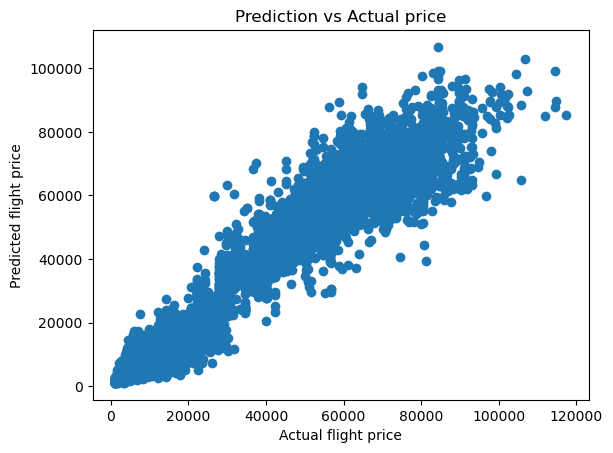

In [101]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title('Prediction vs Actual price')

In [102]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [109]:
importances =dict(zip(reg.feature_names_in_, reg.feature_importances_ ))
sorted_importances = sorted(importances.items(), key =lambda x:x[1], reverse = True)
sorted_importances

[('class', np.float64(0.8800770111033732)),
 ('duration', np.float64(0.05736021724824734)),
 ('days_left', np.float64(0.01856779851933704)),
 ('airline_Vistara', np.float64(0.005309892662329999)),
 ('airline_Air_India', np.float64(0.00476451600075018)),
 ('source_Delhi', np.float64(0.0034831130829235733)),
 ('dest_Delhi', np.float64(0.0032945396494682986)),
 ('source_Mumbai', np.float64(0.0022098299906445408)),
 ('dest_Mumbai', np.float64(0.0019167074581133458)),
 ('source_Kolkata', np.float64(0.0018273291985991926)),
 ('dest_Kolkata', np.float64(0.0017927739483074479)),
 ('stops', np.float64(0.0017705995400645093)),
 ('dest_Hyderabad', np.float64(0.0016225691493864452)),
 ('arrival_Evening', np.float64(0.0015641349453483751)),
 ('source_Hyderabad', np.float64(0.0013098617023194886)),
 ('dest_Bangalore', np.float64(0.0012665901386154008)),
 ('arrival_Night', np.float64(0.001146047230154535)),
 ('source_Bangalore', np.float64(0.0011174811541411814)),
 ('departure_Evening', np.float64(0.

In [110]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

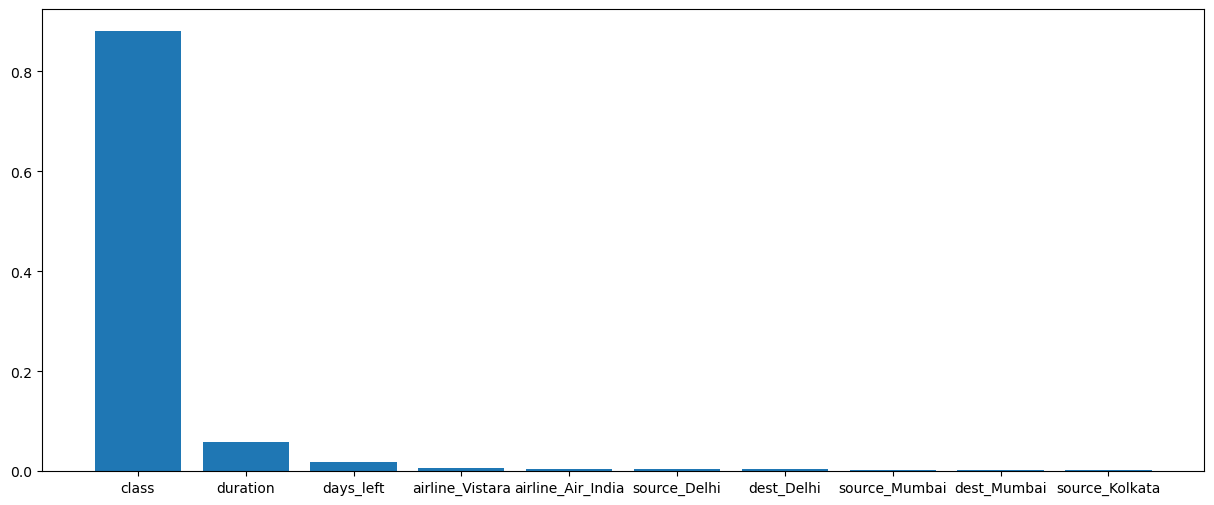

In [117]:
plt.figure(figsize =(15,6))
plt.bar([x[0] for x in sorted_importances[:10]],[x[1]for x in sorted_importances[:10]] )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#parameter1: A, B, C
#parameter2: X,Y,Z

param_dist={
    'n_estimators': randint(100,300),
    'max_depth':[None, 10, 20, 30, 40, 50],
    'min_samples_split' :randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features':[1.0, 'auto','sqrt']
}
reg= RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator =reg, param_distributions= param_dist, n_iter =2, cv =5,
                                   scoring = 'neg_mean_squared_error', verbose = 2, random_state= 10, n_jobs =-1)
random_search.fit(X_train, y_train)

best_regressor= random_search.best_estimator_

In [132]:
best_regressor.score(X_test,y_test)

0.9863435310114276

In [134]:
   import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_regressor.predict(X_test)
print('r2:',r2_score(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))
print('mean_squared_error',mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR:',math.sqrt(mean_squared_error(y_test, y_pred)))

r2: 0.9863435310114276
mean_absolute_error: 1080.9208915000747
mean_squared_error 6987456.994495536
ROOT MEAN SQUARED ERROR: 2643.379843022099
